In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1 ± 10.9) at the Department of Neurology in Cerrahpaşa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1 ± 8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physician’s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions. All subjects were informed about the data collection process, signed informed consent, and attended the test voluntarily in accordance with the approval of Clinical Research Ethics Committee of Bahcesehir University.

# Load the data from a csv
the csv has two levels of column names, grouping the features based on the extraction method.
Although this can be imported directly into the dataframe, it results into a lot of unnamed columns. 
So, the first two lines are read from the csv and fill_empty_with_previous function is used to make the tuples pandas asked to make multilevel column indexes.

https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification

https://www-sciencedirect-com.mu.idm.oclc.org/science/article/pii/S1568494618305799

In [2]:
def fill_empty_with_previous(lst: list[str]) -> list[str]:
    """Fills empty strings in the list with the last non-empty value.

    Args: lst (list[str]): A list of strings where some elements may be empty strings ('').

    Returns: list[str]: The modified list where empty strings are replaced by the last non-empty value.
    
    Example:
        fill_empty_with_previous(['a', '', 'b', '', '']) -> ['a', 'a', 'b', 'b', 'b']
    """
    last_value = ''  # Stores the last non-empty string encountered

    for index, item in enumerate(lst):
        # Skip processing for the last item in the list, for the pd_speech_features dataset this is to avoid labelling class
        if index == len(lst) - 1:
            continue

        # Update last_value if the current item is not empty
        elif item != '':
            last_value = item
        else:
            # Replace empty string with the last non-empty value
            lst[index] = last_value

    return lst

In [3]:
with open('pd_speech_features.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    feature_set = spamreader.__next__()
    features = spamreader.__next__()

feature_set = fill_empty_with_previous(feature_set)
columns = list(zip(feature_set,features))

speech = pd.read_csv('pd_speech_features.csv',header=1)
speech.columns = pd.MultiIndex.from_tuples(columns, names=["Feature set", "feature"])
speech

Feature set             Baseline Features                              \
feature       id gender               PPE      DFA     RPDE numPulses   
0              0      1           0.85247  0.71826  0.57227       240   
1              0      1           0.76686  0.69481  0.53966       234   
2              0      1           0.85083  0.67604  0.58982       232   
3              1      0           0.41121  0.79672  0.59257       178   
4              1      0           0.32790  0.79782  0.53028       236   
..           ...    ...               ...      ...      ...       ...   
751          250      0           0.80903  0.56355  0.28385       417   
752          250      0           0.16084  0.56499  0.59194       415   
753          251      0           0.88389  0.72335  0.46815       381   
754          251      0           0.83782  0.74890  0.49823       340   
755          251      0           0.81304  0.76471  0.46374       340   

Feature set                                                                    \
feature     numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter   
0                        239         0.008064           0.000087      0.00218   
1                        233         0.008258           0.000073      0.00195   
2                        231         0.008340           0.000060      0.00176   
3                        177         0.010858           0.000183      0.00419   
4                        235         0.008162           0.002669      0.00535   
..                       ...              ...                ...          ...   
751                      416         0.004627           0.000052      0.00064   
752                      413         0.004550           0.000220      0.00143   
753                      380         0.005069           0.000103      0.00076   
754                      339         0.005679           0.000055      0.00092   
755                      339         0.005676           0.000037      0.00078   

Feature set  ...             TQWT Features                            \
feature      ... tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0            ...                    1.5620                    2.6445   
1            ...                    1.5589                    3.6107   
2            ...                    1.5643                    2.3308   
3            ...                    3.7805                    3.5664   
4            ...                    6.1727                    5.8416   
..           ...                       ...                       ...   
751          ...                    3.0706                    3.0190   
752          ...                    1.9704                    1.7451   
753          ...                   51.5607                   44.4641   
754          ...                   19.1607                   12.8312   
755          ...                   62.9927                   21.8152   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                              3.8686                    4.2105   
1                             23.5155                   14.1962   
2                              9.4959                   10.7458   
3                              5.2558                   14.0403   
4                              6.0805                    5.7621   
..                                ...                       ...   
751                            3.1212                    2.4921   
752                            1.8277                    2.4976   
753                           26.1586                    6.3076   
754                            8.9434                    2.2044   
755                            9.2457                    4.8555   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                              5.1221                

In [4]:
column_list = list(speech.columns)
feature_columns  = column_list.copy()
feature_columns .remove(('','id'))
feature_columns .remove(('','class'))

check if they are same ish before meaning
Pca
Heat map (euclidian distance)

think about imbalance

check all data errors in code and shwow them
- missing values
- outliers
- duplicates
- inconsistencies
- mislabels

# Error Types
## duplicates
### detection

In [5]:
duplicates = speech.duplicated()
print(f"Duplicates exist: {duplicates.any()}")
print(f"Number of duplicate rows: {duplicates.sum()}")
duplicated_patient_ids = speech[duplicates][('','id')].values
speech[speech[('','id')].isin(duplicated_patient_ids)]


Duplicates exist: True
Number of duplicate rows: 1


Feature set            Baseline Features                              \
feature      id gender               PPE      DFA     RPDE numPulses   
111          37      0           0.79067  0.58465  0.64250       321   
112          37      0           0.75781  0.57600  0.65037       310   
113          37      0           0.79067  0.58465  0.64250       321   

Feature set                                                                    \
feature     numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter   
111                      320         0.006004           0.000143      0.00207   
112                      309         0.006220           0.000167      0.00196   
113                      320         0.006004           0.000143      0.00207   

Feature set  ...             TQWT Features                            \
feature      ... tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
111          ...                    3.5800                    4.0251   
112          ...                   15.4756                    9.9453   
113          ...                    3.5800                    4.0251   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
111                            2.9654                    3.8369   
112                            7.0538                    5.7651   
113                            2.9654                    3.8369   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
111                            4.2973                    3.6458   
112                            3.8592                    4.0615   
113                            4.2973                    3.6458   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35   
111                            3.1854                    3.7708   
112                           14.3037                   20.1550   
113                            3.1854                    3.7708   

Feature set                                  
feature     tqwt_kurtosisValue_dec_36 class  
111                           10.0693     1  
112                           66.3533     1  
113                           10.0693     1  

[3 rows x 755 columns]

### Correction

In [6]:
# speech= speech.drop_duplicates(keep='first')

## missing values
### detection

#### function definitions

In [7]:
def plot_missing_values_by_class(df: pd.DataFrame, class_column: str, labels: list = []) -> None:
    """
    Plots a heatmap of the percentage of missing values for each feature, grouped by a specified class column.

    Args:
        df (pd.DataFrame): The input dataframe containing the data.
        class_column (str): The name of the column in `df` to group by (i.e., the class).
        labels (list, optional): A list of labels for the y-axis (class labels). Defaults to an empty list.

    Returns:
        None: The function generates and displays a heatmap plot.
    
    Raises:
        ValueError: If the class_column does not exist in the dataframe.
    
    Example:
        plot_missing_values_by_class(df, 'Gender', ['female', 'Male',])
    """
    # Calculate percentage of missing values for each feature and class
    missing_percentages = df.groupby(class_column).apply(lambda x: x.isnull().mean())
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))  # Set figure size
    heatmap = sns.heatmap(missing_percentages, 
                           cmap='YlOrRd',  # Color map for the heatmap
                           cbar_kws={'label': 'Percentage of Missing Values', 
                                      'ticks': [0, 100, 4],  # Set ticks on the color bar
                                      'format': '%.2f'})  # Format for color bar ticks
    plt.title('Missing Values by Class')  # Set title for the figure
    
    # Add custom y-axis labels if provided
    if labels:
        heatmap.set_yticklabels(labels)

    # Customize the color bar
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_ticks([0, missing_percentages.values.max(), 1])  # Set tick positions on the color bar
    colorbar.set_ticklabels(['0%', f'{missing_percentages.values.max()*100:.0f}%', '100%'])  # Set tick labels
    heatmap.set(title=f"Missing values per {class_column[1]}", xlabel="Feature", ylabel=f"{class_column[1]}")  # Set axis labels
    plt.show()  # Display the plot

    
def analyze_missing_values_by_class(df: pd.DataFrame, class_column: set) -> None:
    """
    Analyzes missing values in a DataFrame by class and performs statistical tests.

    Args:
        df (pd.DataFrame): Input DataFrame containing the data.
        class_column (str): Name of the column to group by (i.e., the class).

    Returns:
        None: Prints disparity in missing values and significant relationships.

    Raises:
        ValueError: If class_column does not exist in the dataframe.

    Expected types:
        df (pd.DataFrame): pandas DataFrame
        class_column (str): string representing the class column name

    Example:
        analyze_missing_values_by_class(df, 'Gender')
    """
    
    # Calculate percentage of missing values for each feature and class
    missing_by_class = df.groupby(class_column).apply(lambda x: x.isnull().mean())
    
    # Calculate the difference in missing value percentages between classes
    class_disparity = missing_by_class.diff().iloc[-1].abs().sort_values(ascending=False)
    
    print(f"Disparity in missing values between {class_column[1]}:")
    print(class_disparity)
    
    # Perform chi-square test for independence
    for column in df.columns:
        if column != class_column:
            contingency_table = pd.crosstab(df[class_column], df[column].isnull())
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            if p_value < 0.05:
                print(f"\nSignificant relationship found for {column}")
                print(f"Chi-square statistic: {chi2:.2f}")
                print(f"p-value: {p_value:.4f}")

                
def plot_missing_values_distribution(df: pd.DataFrame, axes: int=0) -> None:
    """
    Plots the distribution of missing values for rows or columns in a DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame containing the data.
        axes (int): Axis along which to calculate missing values. 
                                         1 for rows, 0 for columns. Defaults to 0 (columns).

    Returns:
        None: Displays the histogram plot.

    Example:
        # Plot missing values distribution per row
        plot_missing_values_distribution(df, axes=0)
        
        # Plot missing values distribution per column
        plot_missing_values_distribution(df, axes='columns')
    """
    plt.figure(figsize=(10, 6))
    if axes:
        plt.hist(df.isnull().sum(axis=1), bins=20)
    else:
        plt.hist(df.isnull().sum(), bins=20)
    
    plt.xlim(0)
    if axes:
        plt.title(f'Distribution of Missing Values per Rows')
    else:
        plt.title(f'Distribution of Missing Values per Column')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Frequency')
    plt.show()
                

#### per feature detection (columns)

In [8]:
missing_values = speech.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (speech.isnull().sum() / len(speech)) * 100

# Create a new DataFrame with the results
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Sort the DataFrame by percentage of missing values (descending order)
missing_data = missing_data.sort_values('Percentage Missing', ascending=False)

# Round the percentage to two decimal places
missing_data['Percentage Missing'] = missing_data['Percentage Missing'].round(2)

# Sort the DataFrame by percentage of missing values (descending order)
missing_data = missing_data.sort_values('Percentage Missing', ascending=False)

# Display the resulting DataFrame for only columns with missing values
missing_data[missing_data['Missing Values'] != 0]

,,Missing Values,Percentage Missing
Feature set,feature,,


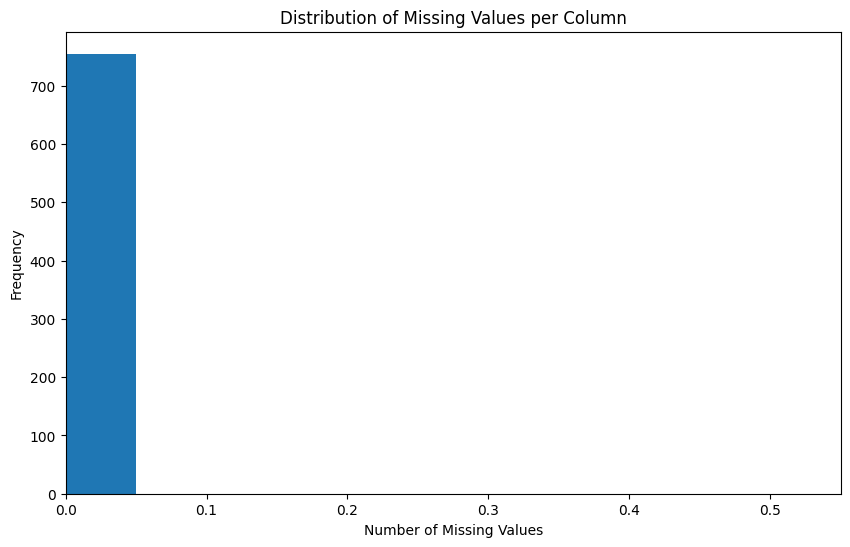

In [9]:
plot_missing_values_distribution(speech)

#### per test detection (rows)

In [10]:
# Calculate missing values per row
missing_values_per_row = speech.isnull().sum(axis=1)

# Calculate percentage of missing values per row
total_columns = len(speech.columns)
missing_percentage_per_row = (missing_values_per_row / total_columns) * 100

# Create a new DataFrame with the results
missing_data_per_row = pd.DataFrame({
    'Missing Values': missing_values_per_row,
    'Percentage Missing': missing_percentage_per_row
})

# Round the percentage to two decimal places
missing_data_per_row['Percentage Missing'] = missing_data_per_row['Percentage Missing'].round(2)

# Sort the DataFrame by percentage of missing values (descending order)
missing_data_per_row = missing_data_per_row.sort_values('Percentage Missing', ascending=False)

# Basic statistics of missing values per row
missing_data_per_row[missing_data_per_row['Missing Values'] != 0]

,Missing Values,Percentage Missing


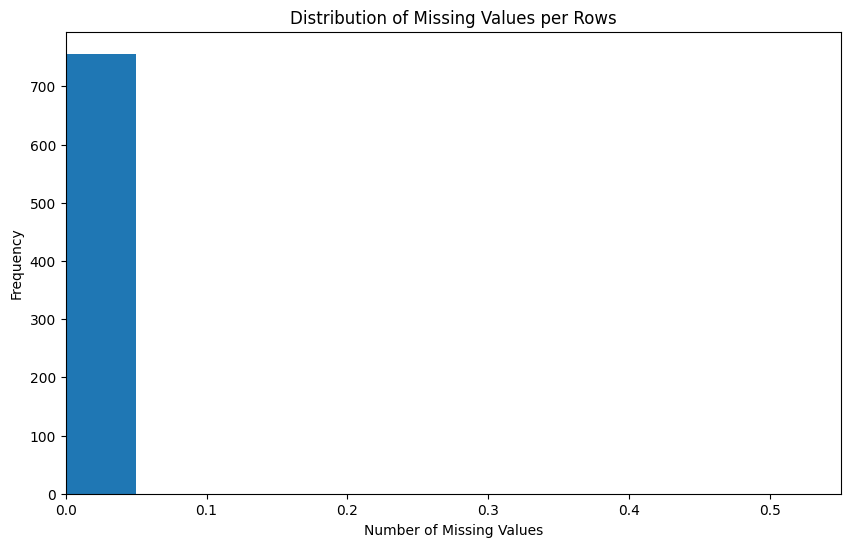

In [11]:
plot_missing_values_distribution(speech, 1)

#### look for disparities between different groups

C:\Users\bradn\AppData\Local\Temp\ipykernel_12212\222469145.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_class = df.groupby(class_column).apply(lambda x: x.isnull().mean())


Disparity in missing values between class:
Feature set       feature                  
                  id                           0.0
TQWT Features     tqwt_medianValue_dec_6       0.0
                  tqwt_TKEO_std_dec_33         0.0
                  tqwt_TKEO_std_dec_34         0.0
                  tqwt_TKEO_std_dec_35         0.0
                                              ... 
Wavelet Features  det_LT_entropy_log_2_coef    0.0
                  det_LT_entropy_log_3_coef    0.0
                  det_LT_entropy_log_4_coef    0.0
                  det_LT_entropy_log_5_coef    0.0
                  class                        0.0
Name: 1, Length: 755, dtype: float64


C:\Users\bradn\AppData\Local\Temp\ipykernel_12212\222469145.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percentages = df.groupby(class_column).apply(lambda x: x.isnull().mean())


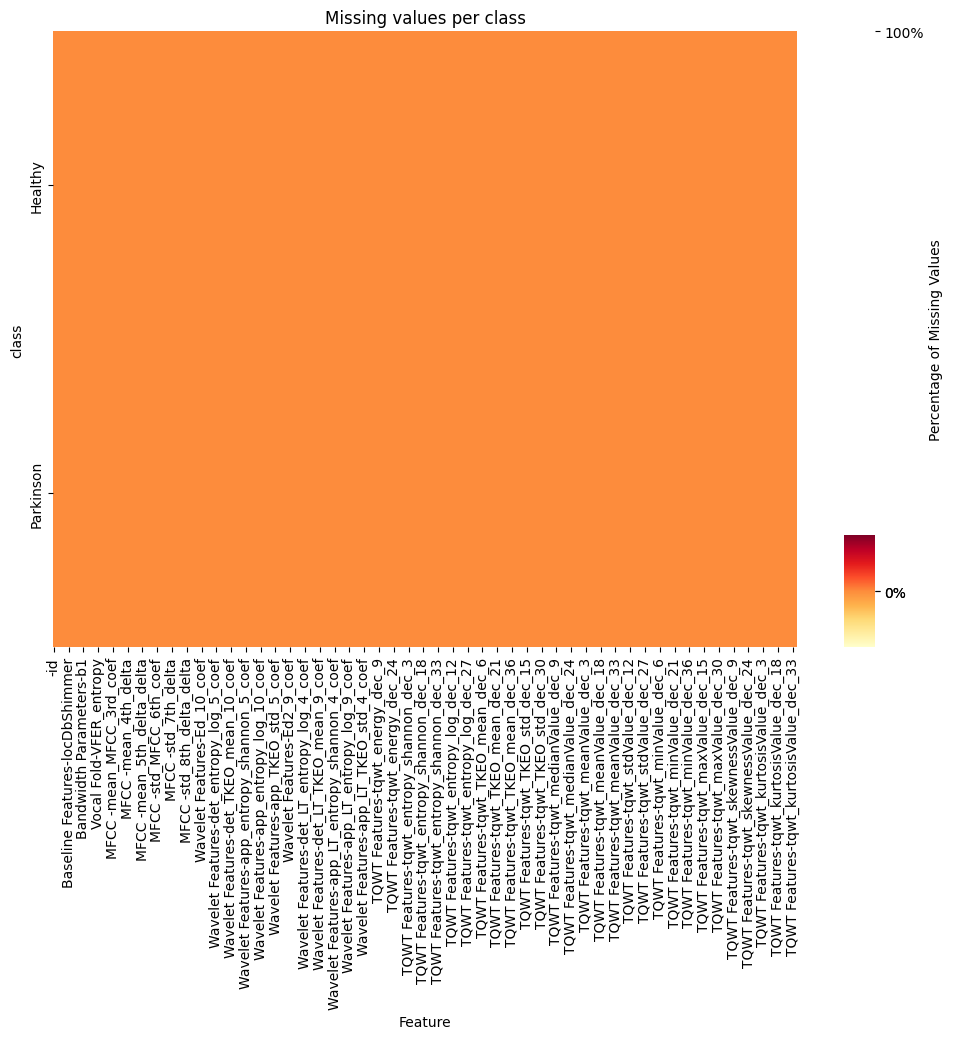

C:\Users\bradn\AppData\Local\Temp\ipykernel_12212\222469145.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_class = df.groupby(class_column).apply(lambda x: x.isnull().mean())


Disparity in missing values between gender:
Feature set       feature                  
                  id                           0.0
TQWT Features     tqwt_medianValue_dec_6       0.0
                  tqwt_TKEO_std_dec_33         0.0
                  tqwt_TKEO_std_dec_34         0.0
                  tqwt_TKEO_std_dec_35         0.0
                                              ... 
Wavelet Features  det_LT_entropy_log_2_coef    0.0
                  det_LT_entropy_log_3_coef    0.0
                  det_LT_entropy_log_4_coef    0.0
                  det_LT_entropy_log_5_coef    0.0
                  class                        0.0
Name: 1, Length: 755, dtype: float64


C:\Users\bradn\AppData\Local\Temp\ipykernel_12212\222469145.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percentages = df.groupby(class_column).apply(lambda x: x.isnull().mean())


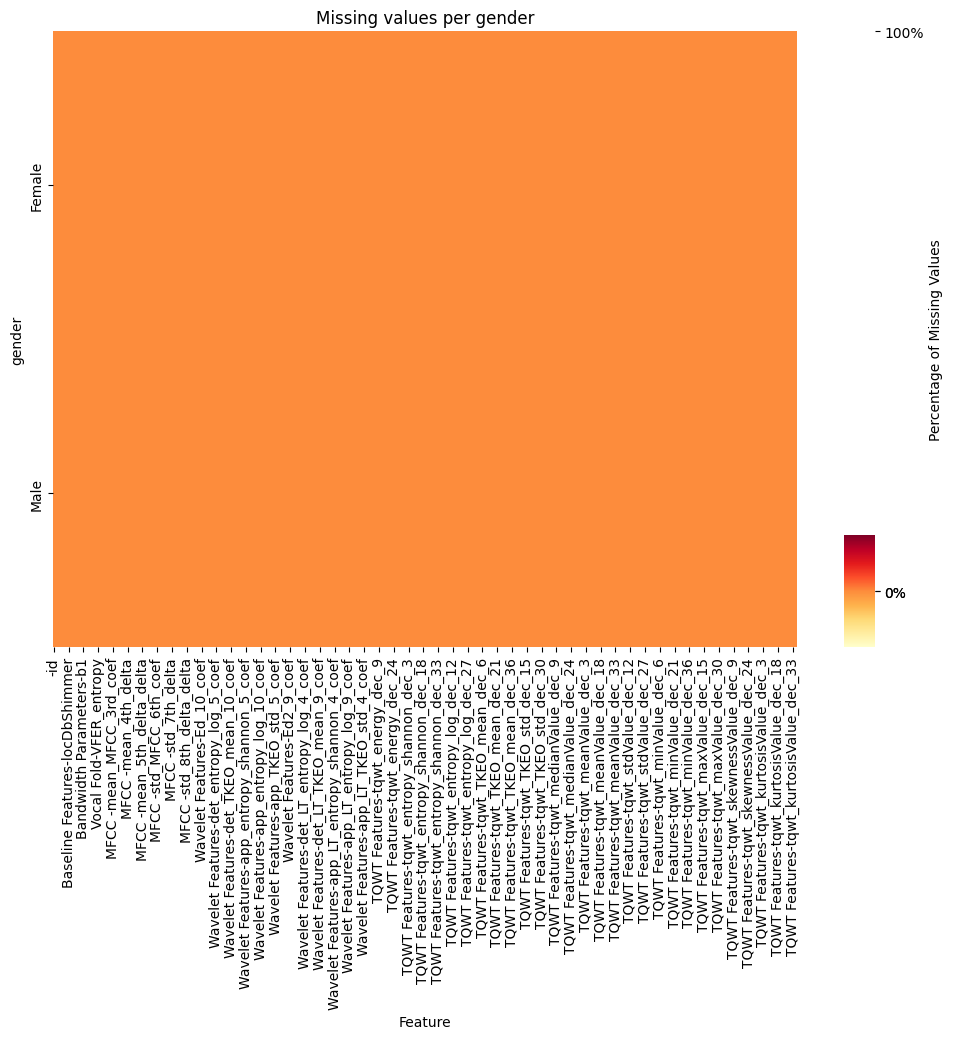

C:\Users\bradn\AppData\Local\Temp\ipykernel_12212\222469145.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_class = df.groupby(class_column).apply(lambda x: x.isnull().mean())


Disparity in missing values between id:
Feature set       feature                  
                  id                           0.0
TQWT Features     tqwt_medianValue_dec_6       0.0
                  tqwt_TKEO_std_dec_33         0.0
                  tqwt_TKEO_std_dec_34         0.0
                  tqwt_TKEO_std_dec_35         0.0
                                              ... 
Wavelet Features  det_LT_entropy_log_2_coef    0.0
                  det_LT_entropy_log_3_coef    0.0
                  det_LT_entropy_log_4_coef    0.0
                  det_LT_entropy_log_5_coef    0.0
                  class                        0.0
Name: 251, Length: 755, dtype: float64


C:\Users\bradn\AppData\Local\Temp\ipykernel_12212\222469145.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percentages = df.groupby(class_column).apply(lambda x: x.isnull().mean())


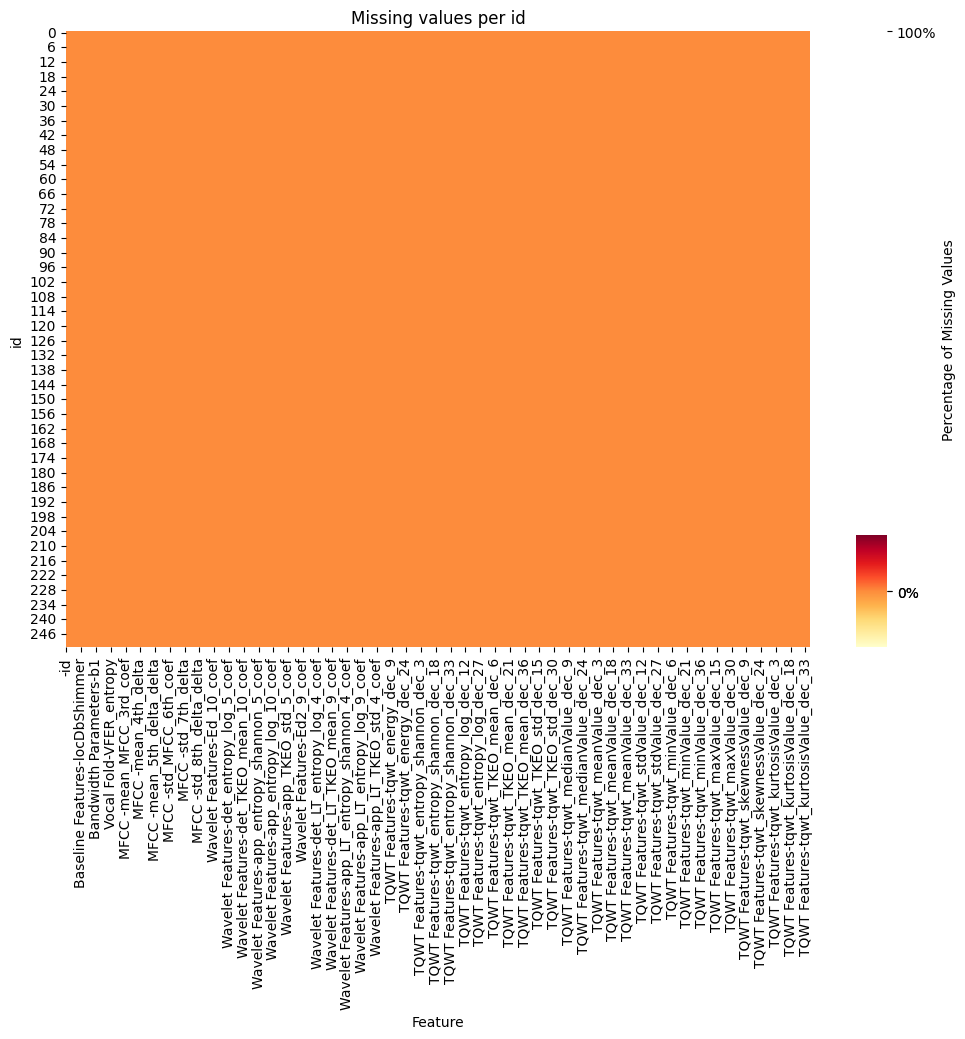

In [12]:
analyze_missing_values_by_class(speech, ('','class'))
plot_missing_values_by_class(speech,('','class'), ['Healthy', 'Parkinson'])

analyze_missing_values_by_class(speech,('','gender'))
plot_missing_values_by_class(speech,('','gender'), ['Female', 'Male'])

analyze_missing_values_by_class(speech,('','id'))
plot_missing_values_by_class(speech,('','id'))

### Correction
drop columns and rows with too many missing values

In [13]:
# Define the acceptable percentage of missing values per feature
ACCEPTABLE_PERCENTAGE_MISSING_PER_FEATURE = 50

# Calculate the minimum count of non-missing values per row
min_count_per_feature = int((100 - ACCEPTABLE_PERCENTAGE_MISSING_PER_FEATURE) / 100 * speech.shape[0] + 1)

# Drop rows containing less than min_count_per_row non-missing values
speech.dropna(axis=1, thresh=min_count_per_feature)

Feature set             Baseline Features                              \
feature       id gender               PPE      DFA     RPDE numPulses   
0              0      1           0.85247  0.71826  0.57227       240   
1              0      1           0.76686  0.69481  0.53966       234   
2              0      1           0.85083  0.67604  0.58982       232   
3              1      0           0.41121  0.79672  0.59257       178   
4              1      0           0.32790  0.79782  0.53028       236   
..           ...    ...               ...      ...      ...       ...   
751          250      0           0.80903  0.56355  0.28385       417   
752          250      0           0.16084  0.56499  0.59194       415   
753          251      0           0.88389  0.72335  0.46815       381   
754          251      0           0.83782  0.74890  0.49823       340   
755          251      0           0.81304  0.76471  0.46374       340   

Feature set                                                                    \
feature     numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter   
0                        239         0.008064           0.000087      0.00218   
1                        233         0.008258           0.000073      0.00195   
2                        231         0.008340           0.000060      0.00176   
3                        177         0.010858           0.000183      0.00419   
4                        235         0.008162           0.002669      0.00535   
..                       ...              ...                ...          ...   
751                      416         0.004627           0.000052      0.00064   
752                      413         0.004550           0.000220      0.00143   
753                      380         0.005069           0.000103      0.00076   
754                      339         0.005679           0.000055      0.00092   
755                      339         0.005676           0.000037      0.00078   

Feature set  ...             TQWT Features                            \
feature      ... tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0            ...                    1.5620                    2.6445   
1            ...                    1.5589                    3.6107   
2            ...                    1.5643                    2.3308   
3            ...                    3.7805                    3.5664   
4            ...                    6.1727                    5.8416   
..           ...                       ...                       ...   
751          ...                    3.0706                    3.0190   
752          ...                    1.9704                    1.7451   
753          ...                   51.5607                   44.4641   
754          ...                   19.1607                   12.8312   
755          ...                   62.9927                   21.8152   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                              3.8686                    4.2105   
1                             23.5155                   14.1962   
2                              9.4959                   10.7458   
3                              5.2558                   14.0403   
4                              6.0805                    5.7621   
..                                ...                       ...   
751                            3.1212                    2.4921   
752                            1.8277                    2.4976   
753                           26.1586                    6.3076   
754                            8.9434                    2.2044   
755                            9.2457                    4.8555   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                              5.1221                

In [14]:
# Define the acceptable percentage of missing values per row
ACCEPTABLE_PERCENTAGE_MISSING_PER_ROW = 50

# Calculate the minimum count of non-missing values per row
min_count_per_row = int((100 - ACCEPTABLE_PERCENTAGE_MISSING_PER_ROW) / 100 * speech.shape[1] + 1)

# Drop rows containing less than min_count_per_row non-missing values
speech.dropna(axis=0, thresh=min_count_per_row)

Feature set             Baseline Features                              \
feature       id gender               PPE      DFA     RPDE numPulses   
0              0      1           0.85247  0.71826  0.57227       240   
1              0      1           0.76686  0.69481  0.53966       234   
2              0      1           0.85083  0.67604  0.58982       232   
3              1      0           0.41121  0.79672  0.59257       178   
4              1      0           0.32790  0.79782  0.53028       236   
..           ...    ...               ...      ...      ...       ...   
751          250      0           0.80903  0.56355  0.28385       417   
752          250      0           0.16084  0.56499  0.59194       415   
753          251      0           0.88389  0.72335  0.46815       381   
754          251      0           0.83782  0.74890  0.49823       340   
755          251      0           0.81304  0.76471  0.46374       340   

Feature set                                                                    \
feature     numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter   
0                        239         0.008064           0.000087      0.00218   
1                        233         0.008258           0.000073      0.00195   
2                        231         0.008340           0.000060      0.00176   
3                        177         0.010858           0.000183      0.00419   
4                        235         0.008162           0.002669      0.00535   
..                       ...              ...                ...          ...   
751                      416         0.004627           0.000052      0.00064   
752                      413         0.004550           0.000220      0.00143   
753                      380         0.005069           0.000103      0.00076   
754                      339         0.005679           0.000055      0.00092   
755                      339         0.005676           0.000037      0.00078   

Feature set  ...             TQWT Features                            \
feature      ... tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0            ...                    1.5620                    2.6445   
1            ...                    1.5589                    3.6107   
2            ...                    1.5643                    2.3308   
3            ...                    3.7805                    3.5664   
4            ...                    6.1727                    5.8416   
..           ...                       ...                       ...   
751          ...                    3.0706                    3.0190   
752          ...                    1.9704                    1.7451   
753          ...                   51.5607                   44.4641   
754          ...                   19.1607                   12.8312   
755          ...                   62.9927                   21.8152   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                              3.8686                    4.2105   
1                             23.5155                   14.1962   
2                              9.4959                   10.7458   
3                              5.2558                   14.0403   
4                              6.0805                    5.7621   
..                                ...                       ...   
751                            3.1212                    2.4921   
752                            1.8277                    2.4976   
753                           26.1586                    6.3076   
754                            8.9434                    2.2044   
755                            9.2457                    4.8555   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                              5.1221                

Impute  missing values

## Outliers

In [22]:
# Set the number of standard deviations to consider as the threshold
threshold = 3

# Calculate the mean and standard deviation for each feature
mean = speech.mean()
std_dev = speech.std()

# Detect outliers: (value - mean) > threshold * std
outliers = (np.abs(speech - mean) > threshold * std_dev)
outlier_rows = speech[outliers.any(axis=1)]

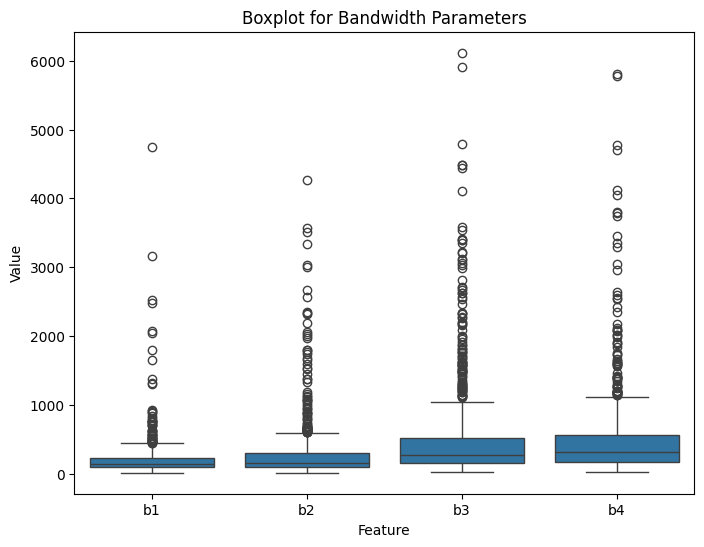

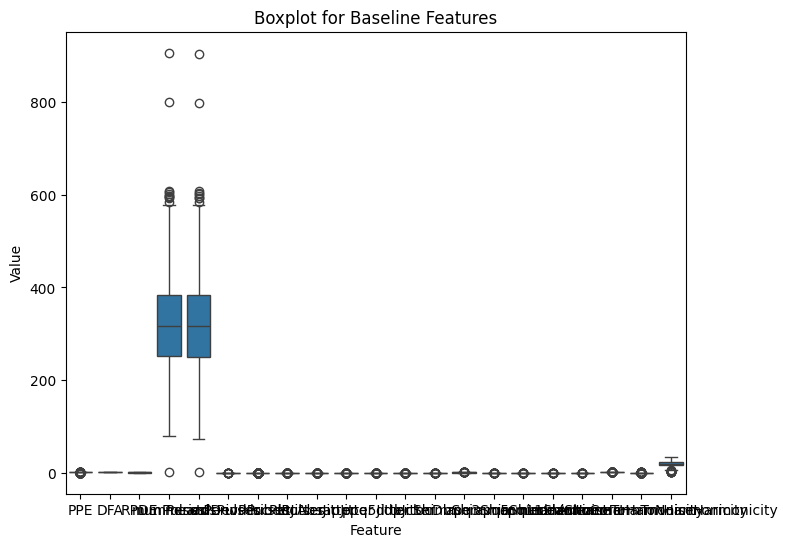

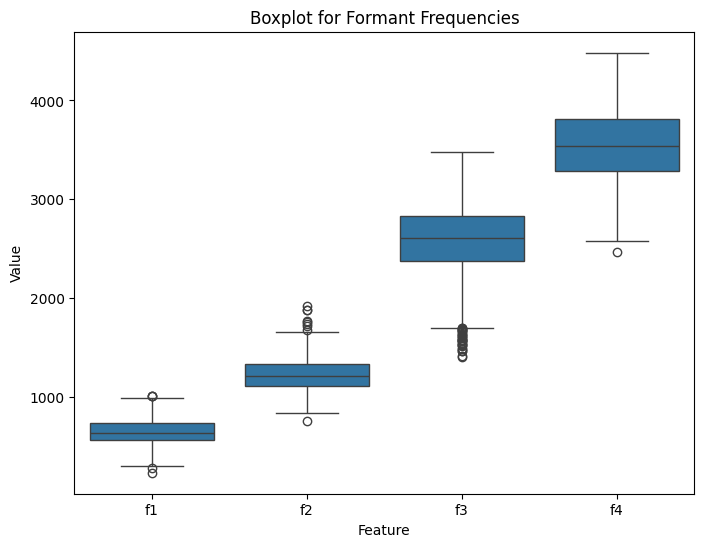

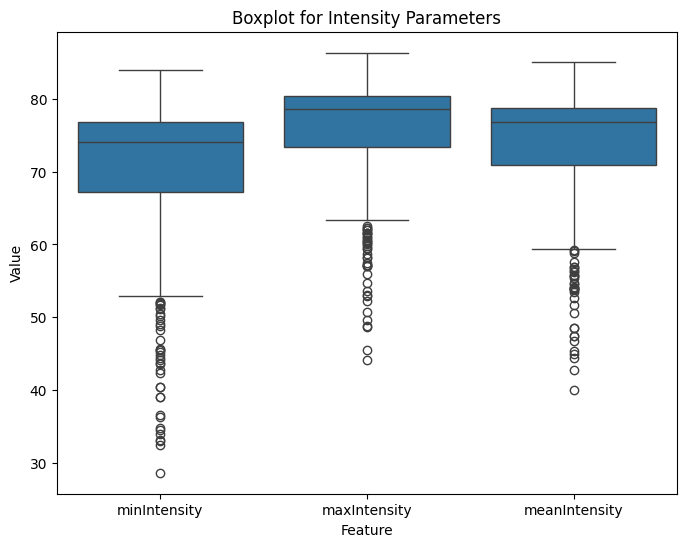

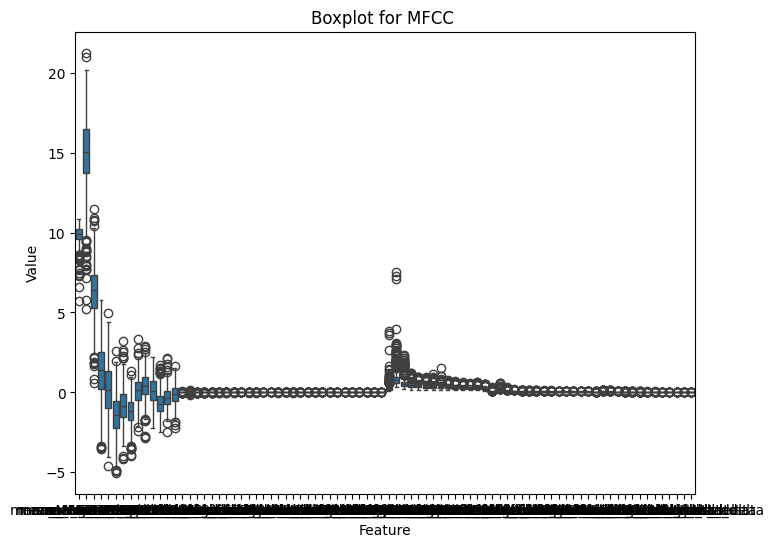

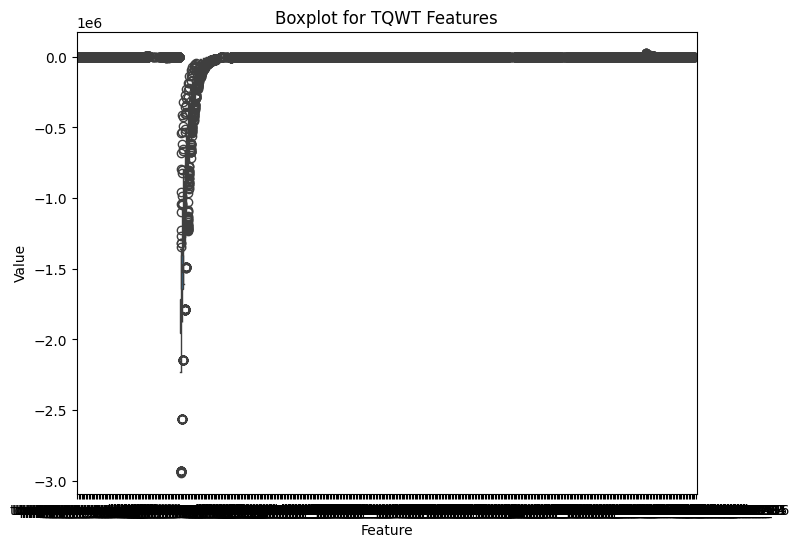

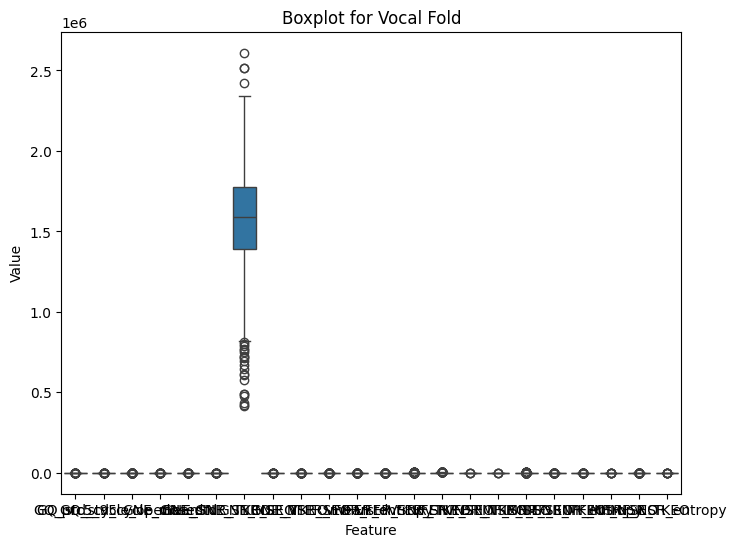

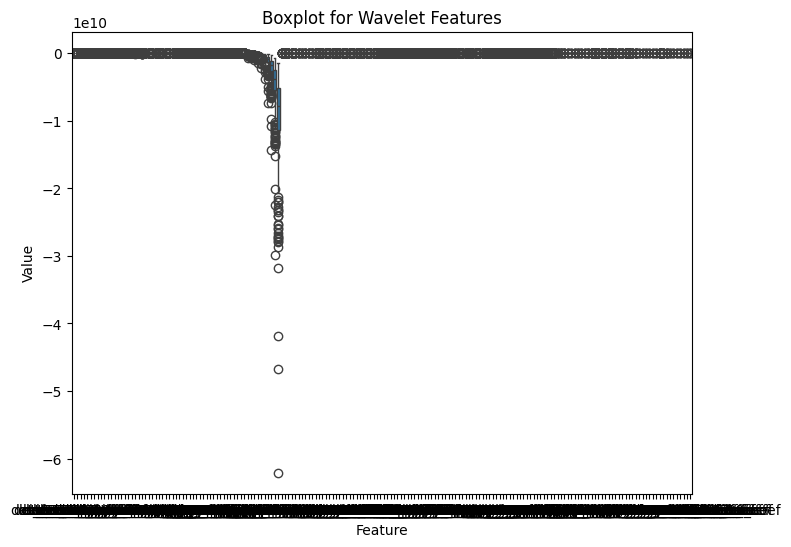

In [35]:
# Loop over each Group (1st level index)
for group in speech.columns.levels[0]:
    if not group:
        continue
    # Select the features corresponding to this group
    group_data = speech[group]

    # Reshape the data into long format for seaborn
    group_melted = group_data.melt(var_name='Feature', value_name='Value')

    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Feature', y='Value', data=group_melted)

    # Add a title
    plt.title(f'Boxplot for {group}')
    plt.show()

In [42]:
index = pd.MultiIndex.from_tuples(columns, names=["Feature set", "feature"])

#Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(speech)

# Convert the scaled data back to a DataFrame with the original MultiIndex
df_scaled = pd.DataFrame(df_scaled, columns=index)
df_scaled

Feature set                     Baseline Features                      \
feature            id    gender               PPE       DFA      RPDE   
0           -1.725191  0.968742          0.627644  0.256144  0.605835   
1           -1.725191  0.968742          0.121620 -0.080433  0.368415   
2           -1.725191  0.968742          0.617950 -0.349839  0.733609   
3           -1.711445 -1.032266         -1.980560  1.382279  0.753631   
4           -1.711445 -1.032266         -2.472989  1.398068  0.300123   
..                ...       ...               ...       ...       ...   
751          1.711445 -1.032266          0.370878 -1.964406 -1.494032   
752          1.711445 -1.032266         -3.460449 -1.943738  0.749044   
753          1.725191 -1.032266          0.813362  0.329201 -0.152220   
754          1.725191 -1.032266          0.541051  0.695920  0.066780   
755          1.725191 -1.032266          0.394581  0.922840 -0.184327   

Feature set                                                                 \
feature     numPulses numPeriodsPulses meanPeriodPulses stdDevPeriodPulses   
0           -0.846892        -0.842373         0.933328          -0.407251   
1           -0.907404        -0.902773         1.040014          -0.426092   
2           -0.927575        -0.922907         1.084576          -0.443557   
3           -1.472186        -1.466513         2.464215          -0.275316   
4           -0.887233        -0.882640         0.987044           3.143597   
..                ...              ...              ...                ...   
751          0.938221         0.939445        -0.949508          -0.454833   
752          0.918050         0.909245        -0.991826          -0.224083   
753          0.575147         0.577042        -0.707165          -0.385449   
754          0.161646         0.164304        -0.373097          -0.450845   
755          0.161646         0.164304        -0.374874          -0.475599   

Feature set               ...             TQWT Features  \
feature     locPctJitter  ... tqwt_kurtosisValue_dec_28   
0              -0.054993  ...                 -0.584822   
1              -0.142570  ...                 -0.584895   
2              -0.214916  ...                 -0.584767   
3               0.710353  ...                 -0.532242   
4               1.152045  ...                 -0.475545   
..                   ...  ...                       ...   
751            -0.641378  ...                 -0.549067   
752            -0.340570  ...                 -0.575143   
753            -0.595685  ...                  0.600185   
754            -0.534762  ...                 -0.167720   
755            -0.588070  ...                  0.871132   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_29 tqwt_kurtosisValue_dec_30   
0                           -0.619412                 -0.576762   
1                           -0.589778                  0.193084   
2                           -0.629033                 -0.356261   
3                           -0.591137                 -0.522406   
4                           -0.521356                 -0.490090   
..                                ...                       ...   
751                         -0.607926                 -0.606048   
752                         -0.646996                 -0.656733   
753                          0.663206                  0.296651   
754                         -0.306983                 -0.377910   
755                         -0.031441                 -0.366065   

Feature set                                                      \
feature     tqwt_kurtosisValue_dec_31 tqwt_kurtosisValue_dec_32   
0                           -0.482286                 -0.399331   
1                            0.016183                 -0.067120   
2                           -0.156055                 -0.067593   
3                            0.008400                 -0.449